# CS 105 Team 7 Mini Project Report

[]

[]

1. What data do you have? (Your answer)
2. What would you like to know? (Your answer)
3. Explore, present and analyze the data. (Generate statistics, perform visualizations)
4. Can you state any hypotheses or make predictions? Which tests can you apply to
5. Verify your hypothesis? (Your answer).
6. Test your hypotheses. Draw the conclusions.
7. Draw the overall conclusion



In [ ]:
#test 1, lets cook

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('responses.csv')

In [ ]:
#Lydia's Chunk: Heatmap Visualization
# Comparing the on campus choice of food vs scale of imposter syndrome (1-5)
# On campus food choice: EV - FE
    # Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Subway]
    # Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Habit Burger]
# Imposter syndrome: DM
    # The National Library of Medicine defines imposter syndrome as, " a behavioral health phenomenon described as self-doubt of intellect, skills, or accomplishments among high-achieving individuals" ("Imposter Phenomenon", 2023). Based on this definition please rate your level of imposter syndrome through your journey in your major.
IS_scale_col = df['The National Library of Medicine defines imposter syndrome as, " a behavioral health phenomenon described as self-doubt of intellect, skills, or accomplishments among high-achieving individuals" ("Imposter Phenomenon", 2023). Based on this definition please rate your level of imposter syndrome through your journey in your major. ']
IS_scale_col.name = "Imposter_Syndrome_Scale"
# print(IS_scale_col.head()) # test print

# create a subset to extract the questions
# then rename the columns
rest_rating_cols = df[[c for c in df.columns if "Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often)." in c]]
rest_rating_cols.columns = rest_rating_cols.columns.str.extract(r'\[(.*)\]')[0]
# print(rest_rating_cols.columns.tolist()) # test print


In [81]:
# convert to numeric
# rest_rating_cols.head() # test print
rest_rating_cols = rest_rating_cols.apply(lambda col: col.astype(str).str.split(' - ').str[0])
rest_rating_cols = rest_rating_cols.apply(pd.to_numeric, errors='coerce')
rest_rating_cols.head() # test print


,Subway,Habit Burger,Panda Express,Chronic Tacos,Hibachi-san,Halal Shack,The Barns,Scotty convenient store,Dining hall (Glasgow and Lothian)
0,1,1,3,1,3,1,1,3,3
1,2,2,2,2,2,1,1,3,1
2,1,1,1,1,1,1,1,1,1
3,3,1,2,1,1,1,1,5,1
4,1,1,1,2,1,1,1,2,1


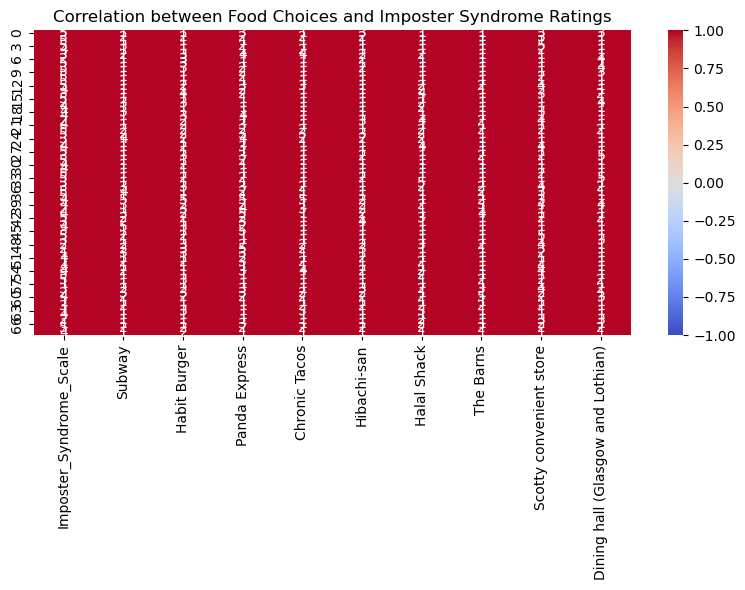

In [8]:
combined_df = pd.concat([IS_scale_col, rest_rating_cols], axis=1)

# convert to numeric 
combined_df = combined_df.apply(pd.to_numeric, errors='coerce')

# correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(combined_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Food Choices and Imposter Syndrome Ratings")
plt.tight_layout()
plt.show()

# question 2 - favorite cuisine vs on-campus food choice

In [82]:
# fav cuisine vs restaurant preference
    # Please rank the following cuisines by your preference (1 being dislike, 5 being like)
fav_cuisine = df[[c for c in df.columns if "Please rank the following cuisines by your preference. (1 being dislike, 5 being like)" in c]]
fav_cuisine.columns = fav_cuisine.columns.str.extract(r'\[(.*)\]')[0]
# print(fav_cuisine.columns.tolist())

# convert to numeric
fav_cuisine = fav_cuisine.apply(lambda col: col.astype(str).str.split(' - ').str[0])
fav_cuisine = fav_cuisine.apply(pd.to_numeric, errors='coerce')
fav_cuisine

,Chinese food,Japanese food,Korean food,Indian food,Vietnamese food,American food,Italian food,Mexican food,Mediterranean food,Fusion / Modern mix cuisine,Other Cuisine (please specify in the next question)
0,5,5,3,2,2,2,5,2,2,2,1
1,1,2,3,3,3,4,5,4,4,3,4
2,4,4,3,3,3,5,5,4,3,3,3
3,5,5,4,1,4,1,4,1,1,1,1
4,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
119,5,4,3,3,3,4,4,5,3,3,3
120,5,5,5,3,5,1,3,1,3,3,1
121,3,2,4,2,2,2,4,2,4,4,2
122,5,5,3,5,5,4,5,5,5,5,5


In [83]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(r, center= 0, cmap = "coolwarm",annot= True)
# sns.heatmap(count_matrix, annot=True, cmap="YlGnBu", fmt="d")
# plt.title("Count of Respondents: Favorite Cuisine × Restaurant Choice")
# plt.xlabel("Restaurant")
# plt.ylabel("Cuisine")
# plt.tight_layout()
# plt.show()

In [ ]:
# find other cuisine and rating pairs
df3 = df[["Please rank the following cuisines by your preference. (1 being dislike, 5 being like) [Other Cuisine (please specify in the next question)]", "Please list any other cuisines not included."]]
df3 = df3.rename(columns={
   "Please rank the following cuisines by your preference. (1 being dislike, 5 being like) [Other Cuisine (please specify in the next question)]": "other_cuisine_rate",
    "Please list any other cuisines not included.": "cuisine_name"
})
# print(df3["cuisine_name"].unique())

['N/a' 'none' nan 'convenience foods' 'the rest was uncluded'
 'Salvadorean' 'African Food' '0' 'n/A'
 'Russian and Eastern European dishes' 'no' 'Na' 'Middle Eastern'
 'tai food' 'Mongolian' 'Thai' 'Ethiopian' 'filipino' 'Thai food'
 'Not sure if it counts as mediterranean, but I like food from the Middle East.'
 'Filipino food' 'Nigerian, west African '
 'I dont know any other not listed' 'idk' 'Not sure' 'Anything'
 'Taiwanese food' 'Soul Food' 'South African' 'Spanish Food'
 "I don't know any others" 'French food'
 '̸̧̛̺̹̟̮͇͖̺̹͇͉̪̹͇͇̈́́̒̋͌̄̑̊̍̔͘͝ͅͅ¿̷̨̯̖̯͙̳̙̖̹̱̤͎̱̤̳́͛̈́̈́̈́̒̉͊͛̕͘̚̕͜' '-'
 'Pizza' 'Snacks' "Couldn't think of any" 'Pakistani Food'
 'Eastern European' 'na' 'Filipino' 'Sri Lankan' 'None ' 'Malaysian Food'
 'Indonesian food' 'chipotle' 'No']


In [94]:
df3_cleaned = df3.replace(['nan','0','NA', 'na', 'Na', 'N/A','N/a',"Couldn't think of any", "n/A", "no","none",
                           "Not sure","I don't know any others", "N/a",'the rest was uncluded','None ', 'No','idk',
                           '̸̧̛̺̹̟̮͇͖̺̹͇͉̪̹͇͇̈́́̒̋͌̄̑̊̍̔͘͝ͅͅ¿̷̨̯̖̯͙̳̙̖̹̱̤͎̱̤̳́͛̈́̈́̈́̒̉͊͛̕͘̚̕͜','I dont know any other not listed','-','Snacks',"Pizza",'chipotle','convenience foods'], pd.NA).dropna()
print(df3_cleaned["cuisine_name"].unique())

['Salvadorean' 'African Food' 'Russian and Eastern European dishes'
 'Middle Eastern' 'tai food' 'Mongolian' 'Thai' 'Ethiopian' 'filipino'
 'Thai food'
 'Not sure if it counts as mediterranean, but I like food from the Middle East.'
 'Filipino food' 'Nigerian, west African ' 'Anything' 'Taiwanese food'
 'Soul Food' 'South African' 'Spanish Food' 'French food' 'Pakistani Food'
 'Eastern European' 'Filipino' 'Sri Lankan' 'Malaysian Food'
 'Indonesian food']


In [70]:
# clean the data
df3_cleaned = df3.replace(['nan','0','NA', 'na', 'Na', 'N/A','N/a',"Couldn't think of any", "n/A", "no","none","Not sure","I don't know any others"], pd.NA).dropna()
# convert to numeric
df3_cleaned['other_cuisine_rate'] = (df3_cleaned['other_cuisine_rate'].astype(str).str.split(' - ').str[0])
df3_cleaned['other_cuisine_rate'] = pd.to_numeric(df3_cleaned['other_cuisine_rate'], errors='coerce')
df3_cleaned.head()

,other_cuisine_rate,cuisine_name
4,5,Thai
7,3,Snacks
9,3,African Food
14,3,tai food
17,4,Soul Food


In [73]:
# remove 'Other Cuisine' column
fav_cuisine = fav_cuisine.drop('Other Cuisine (please specify in the next question)', axis=1, errors='ignore')

df3_pivot = df3_cleaned.pivot_table(              # or 
    # index = df3_cleaned.index,
    columns='cuisine_name',
    values='other_cuisine_rate'
).reset_index()

df3_pivot


cuisine_name,index,African Food,Eastern European,Ethiopian,Filipino,Indonesian food,Malaysian Food,Mongolian,Pakistani Food,Russian and Eastern European dishes,Snacks,Soul Food,South African,Spanish Food,Thai,chipotle,convenience foods,tai food
0,other_cuisine_rate,3.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,3.0,1.0,3.0


In [ ]:
# year categorical -> 
# How many times a week do you eat out? categorical
# imposter syndrome scale numerical
# seating preference numerical: From the front of the class (ranked 1) to the back of the class (ranked 5), where do you sit on average for lecture?


In [ ]:
# parallel coordinates plot
# year
# imposter syndrome (mean)
# Rank your preferred methods for seeking clarification from the professor on course material x4
# ^ aggfunc = count
